# HW4-1
# Yuwei Bao
# 9/22/2024

(p.18) Let’s check that the models used so far are reasonable, although there’s still room for improvement

- While keeping other parameters the same as before
1. Try using one or three intermediate layers instead of two. See how doing so affects validation and test accuracy
2. Try using layers with more units or fewer units: 8 units or 32 units
3. Try using the mse loss function instead of binary_crossentropy

- There are a total of 5 conditions above. For each case, you need to first plot the train/validation accuracy to decide the optimal epochs (such as 4 as before). Plot the figures and report these numbers

- For each condition, report training/validation/test accuracy after training with the optimal epoch determined above


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb

## Original codes from slides

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Prepare the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


In [2]:
# Build the model
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Use first 10000 examples as a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.6824 - loss: 0.6299 - val_accuracy: 0.8402 - val_loss: 0.4538
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8819 - loss: 0.3923 - val_accuracy: 0.8823 - val_loss: 0.3362
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9100 - loss: 0.2798 - val_accuracy: 0.8865 - val_loss: 0.2954
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9315 - loss: 0.2148 - val_accuracy: 0.8832 - val_loss: 0.2893
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9399 - loss: 0.1824 - val_accuracy: 0.8873 - val_loss: 0.2795
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9532 - loss: 0.1519 - val_accuracy: 0.8864 - val_loss: 0.2785
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9560 - loss: 0.1375 - val_accuracy: 0.8869 - val_loss: 0.2872
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accura

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

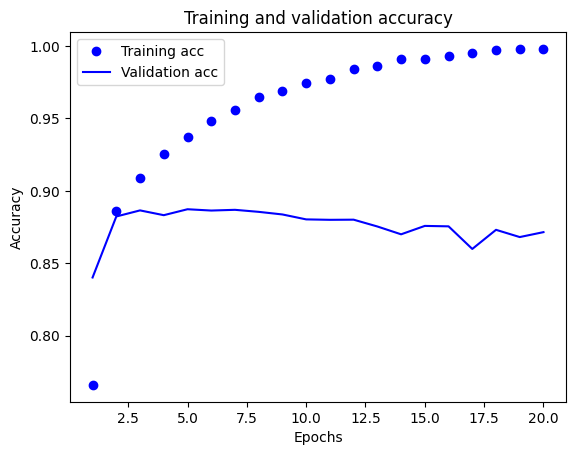

In [5]:
# Plot accuracy
epochs = list(range(1,21))
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Overfitting: training acc >> validation acc !!!
Let’s try this: retrain the model but stop early (epochs=4)

In [10]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) ## [loss, metrics]
print(results) ## SOTA: ~%95

# Use trained model to predict on new data
model.predict(x_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7211 - loss: 0.5696
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8998 - loss: 0.2973
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9186 - loss: 0.2256
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9296 - loss: 0.1921
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8828 - loss: 0.2880
[0.2848932147026062, 0.8849999904632568]
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23099776],
       [0.99907696],
       [0.8912808 ],
       ...,
       [0.15275368],
       [0.08110653],
       [0.7108102 ]], dtype=float32)

### Output test/validate accuracy

In [23]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
print(acc)
print(val_acc)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.7616 - loss: 0.5348 - val_accuracy: 0.9030 - val_loss: 0.2959
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9066 - loss: 0.2744 - val_accuracy: 0.9310 - val_loss: 0.2109
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9252 - loss: 0.2128 - val_accuracy: 0.9473 - val_loss: 0.1683
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9381 - loss: 0.1765 - val_accuracy: 0.9568 - val_loss: 0.1431
[0.8263999819755554, 0.9065600037574768, 0.9237599968910217, 0.9353200197219849]
[0.902999997138977, 0.9309999942779541, 0.9473000168800354, 0.9567999839782715]


## 1. Try using one or three intermediate layers instead of two. See how doing so affects validation and test accuracy

### One intermediate layer

#### 1. Plot the train/validation accuracy to decide the optimal epochs

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7062 - loss: 0.5861 - val_accuracy: 0.8684 - val_loss: 0.4021
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8965 - loss: 0.3513 - val_accuracy: 0.8825 - val_loss: 0.3297
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9194 - loss: 0.2704 - val_accuracy: 0.8847 - val_loss: 0.2993
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9289 - loss: 0.2295 - val_accuracy: 0.8896 - val_loss: 0.2827
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9415 - loss: 0.1948 - val_accuracy: 0.8891 - val_loss: 0.2763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9462 - loss: 0.1787 - val_accuracy: 0.8900 - val_loss: 0.2748
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9515 - loss: 0.1580 - val_accuracy: 0.8888 - val_loss: 0.2774
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9585 - loss: 0.1417 - val_accuracy: 0.8881 - v

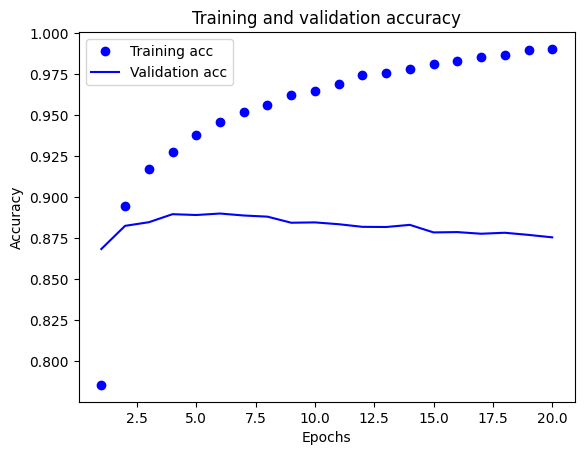

In [35]:
# Build the model
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Use first 10000 examples as a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plot accuracy
epochs = list(range(1,21))
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 2.  Report training/validation/test accuracy after training with the optimal epoch determined above


In [38]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512,validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
print('Training accuracy:')
print(acc)
print('Validation accuracy')
print(val_acc)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7597 - loss: 0.5283 - val_accuracy: 0.9088 - val_loss: 0.2948
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9031 - loss: 0.2857 - val_accuracy: 0.9270 - val_loss: 0.2273
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9216 - loss: 0.2240 - val_accuracy: 0.9393 - val_loss: 0.1882
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9354 - loss: 0.1941 - val_accuracy: 0.9487 - val_loss: 0.1651
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9422 - loss: 0.1711 - val_accuracy: 0.9558 - val_loss: 0.1486
Training accuracy:
[0.8292400240898132, 0.9053999781608582, 0.9205600023269653, 0.9323599934577942, 0.9401999711990356]
Validation accuracy
[0.9088000059127808, 0.9269999861717224, 0.939300000667572, 0.9487000107765198, 0.9557999968528748]


**Using one intermediate layer, we first find the optimal epoch as 5, then use it to find the training accuracy is 0.9401999711990356 and validation accuracy is 0.9557999968528748**

### Three intermediate layers

#### 1. Plot the train/validation accuracy to decide the optimal epochs

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.6738 - loss: 0.6183 - val_accuracy: 0.8626 - val_loss: 0.4051
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8951 - loss: 0.3436 - val_accuracy: 0.8867 - val_loss: 0.3083
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9188 - loss: 0.2464 - val_accuracy: 0.8890 - val_loss: 0.2811
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9326 - loss: 0.1950 - val_accuracy: 0.8839 - val_loss: 0.2892
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9542 - loss: 0.1516 - val_accuracy: 0.8877 - val_loss: 0.2812
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9674 - loss: 0.1170 - val_accuracy: 0.8863 - val_loss: 0.2954
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9715 - loss: 0.1009 - val_accuracy: 0.8845 - val_loss: 0.3095
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9759 - loss: 0.0859 - val_accuracy: 0.8710 - 

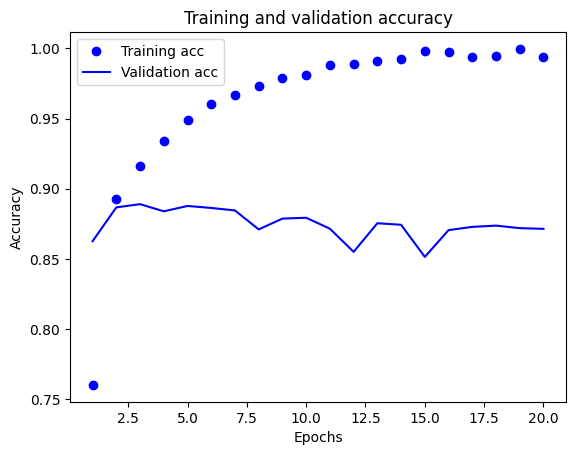

In [4]:
# Build the model
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Use first 10000 examples as a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plot accuracy
epochs = list(range(1,21))
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 2.  Report training/validation/test accuracy after training with the optimal epoch determined above


In [6]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=3, batch_size=512,validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
print('Training accuracy:')
print(acc)
print('Validation accuracy')
print(val_acc)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7302 - loss: 0.5838 - val_accuracy: 0.8942 - val_loss: 0.3220
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8982 - loss: 0.2906 - val_accuracy: 0.9207 - val_loss: 0.2246
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9203 - loss: 0.2203 - val_accuracy: 0.9455 - val_loss: 0.1685
Training accuracy:
[0.8086400032043457, 0.8995199799537659, 0.9215199947357178]
Validation accuracy
[0.8942000269889832, 0.9207000136375427, 0.9455000162124634]


**Using three intermediate layers, we first find the optimal epoch as 3, then use it to find the training accuracy is 0.9215199947357178 and validation accuracy is 0.9455000162124634**

### 1. Conclusion
In summary, since using two intermediate layers with epoch 4 give us training accuracy 0.9353200197219849 and validation accuracy 0.9567999839782715.

Using one intermediate layer, we first find the optimal epoch as 5, then use it to find the training accuracy is 0.9401999711990356 and validation accuracy is 0.9557999968528748

Using three intermediate layers, we first find the optimal epoch as 3, then use it to find the training accuracy is 0.9215199947357178 and validation accuracy is 0.9455000162124634

Thus, two intermediate layers provide best accuracy performance for the dataset.

## 2. Try using layers with more units or fewer units: 8 units or 32 units

### With 8 units

#### 1. Plot the train/validation accuracy to decide the optimal epochs

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.7004 - loss: 0.6271 - val_accuracy: 0.8597 - val_loss: 0.4745
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8883 - loss: 0.4258 - val_accuracy: 0.8718 - val_loss: 0.3853
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9090 - loss: 0.3282 - val_accuracy: 0.8693 - val_loss: 0.3456
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9207 - loss: 0.2714 - val_accuracy: 0.8812 - val_loss: 0.3095
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9359 - loss: 0.2246 - val_accuracy: 0.8896 - val_loss: 0.2854
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9429 - loss: 0.1957 - val_accuracy: 0.8905 - val_loss: 0.2776
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9506 - loss: 0.1728 - val_accuracy: 0.8901 - val_loss: 0.2769
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9538 - loss: 0.1531 - val_accuracy: 0.8821 - 

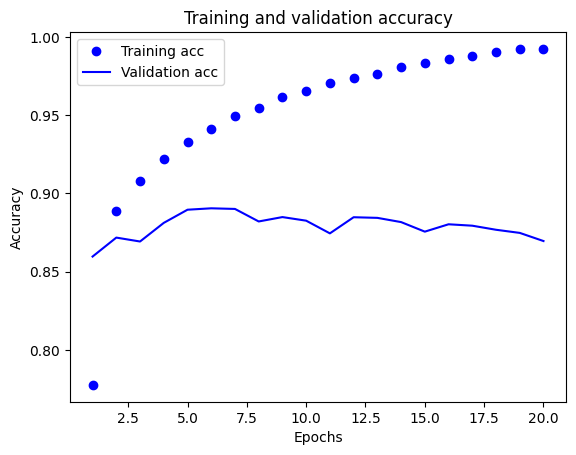

In [28]:
# Build the model
model = keras.Sequential([
  layers.Dense(8, activation="relu"),
  layers.Dense(8, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Use first 10000 examples as a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plot accuracy
epochs = list(range(1,21))
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 2.  Report training/validation/test accuracy after training with the optimal epoch determined above

In [31]:
model = keras.Sequential([
  layers.Dense(8, activation="relu"),
  layers.Dense(8, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=6, batch_size=512,validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
print('Training accuracy:')
print(acc)
print('Validation accuracy')
print(val_acc)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.7040 - loss: 0.6122 - val_accuracy: 0.8839 - val_loss: 0.4083
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8902 - loss: 0.3736 - val_accuracy: 0.9089 - val_loss: 0.2902
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9099 - loss: 0.2789 - val_accuracy: 0.9249 - val_loss: 0.2354
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9240 - loss: 0.2280 - val_accuracy: 0.9342 - val_loss: 0.1980
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9340 - loss: 0.1962 - val_accuracy: 0.9457 - val_loss: 0.1737
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9400 - loss: 0.1762 - val_accuracy: 0.9477 - val_loss: 0.1627
Training accuracy:
[0.7938799858093262, 0.8914399743080139, 0.9108800292015076, 0.9217600226402283, 0.9313600063323975, 0.9393600225448608]
Validation accuracy
[0.883899986743927, 0.9089000225067139, 0.9248999953269958, 0.9341999888420105, 0.94

**Using layers with 8 unit, we first find the optimal epoch as 6, then use it to find the training accuracy is 0.9393600225448608 and validation accuracy is 0.947700023651123**

### With 32 units

#### 1. Plot the train/validation accuracy to decide the optimal epochs

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.6792 - loss: 0.6027 - val_accuracy: 0.8621 - val_loss: 0.3808
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8784 - loss: 0.3329 - val_accuracy: 0.8606 - val_loss: 0.3325
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9160 - loss: 0.2368 - val_accuracy: 0.8784 - val_loss: 0.2976
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9309 - loss: 0.1984 - val_accuracy: 0.8866 - val_loss: 0.2845
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9490 - loss: 0.1490 - val_accuracy: 0.8870 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9607 - loss: 0.1228 - val_accuracy: 0.8705 - val_loss: 0.3410
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9603 - loss: 0.1173 - val_accuracy: 0.8842 - val_loss: 0.3085
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9771 - loss: 0.0824 - val_accuracy: 0.8788 - 

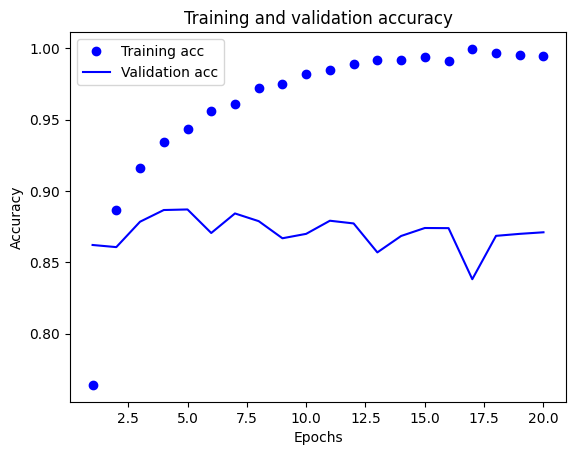

In [30]:
# Build the model
model = keras.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Use first 10000 examples as a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plot accuracy
epochs = list(range(1,21))
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 2.  Report training/validation/test accuracy after training with the optimal epoch determined above

In [32]:
model = keras.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(32, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512,validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
print('Training accuracy:')
print(acc)
print('Validation accuracy')
print(val_acc)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7241 - loss: 0.5476 - val_accuracy: 0.9087 - val_loss: 0.2779
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9026 - loss: 0.2701 - val_accuracy: 0.9336 - val_loss: 0.1965
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9235 - loss: 0.2100 - val_accuracy: 0.9500 - val_loss: 0.1568
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9398 - loss: 0.1693 - val_accuracy: 0.9432 - val_loss: 0.1609
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9445 - loss: 0.1539 - val_accuracy: 0.9652 - val_loss: 0.1144
Training accuracy:
[0.8096799850463867, 0.9028800129890442, 0.9229199886322021, 0.9346799850463867, 0.9421200156211853]
Validation accuracy
[0.9086999893188477, 0.9336000084877014, 0.949999988079071, 0.9431999921798706, 0.9652000069618225]


**Using layers with 32 unit, we first find the optimal epoch as 6, then use it to find the training accuracy is 0.9421200156211853 and validation accuracy is 0.9652000069618225**

### 2. Conclusion
In summary, since using layers with 16 units and epoch 4 give us training accuracy 0.9353200197219849 and validation accuracy 0.9567999839782715.

Using layers with 8 unit, we first find the optimal epoch as 6, then use it to find the training accuracy is 0.9393600225448608 and validation accuracy is 0.947700023651123

Using layers with 32 unit, we first find the optimal epoch as 6, then use it to find the training accuracy is 0.9421200156211853 and validation accuracy is 0.9652000069618225

We see using layers with 32 unit gives the best accuracy.

## 3. Try using the mse loss function instead of binary_crossentropy

#### 1. Plot the train/validation accuracy to decide the optimal epochs

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6735 - loss: 0.2156 - val_accuracy: 0.8578 - val_loss: 0.1365
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8805 - loss: 0.1174 - val_accuracy: 0.8796 - val_loss: 0.1041
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9089 - loss: 0.0859 - val_accuracy: 0.8791 - val_loss: 0.0954
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9266 - loss: 0.0682 - val_accuracy: 0.8863 - val_loss: 0.0886
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9393 - loss: 0.0566 - val_accuracy: 0.8865 - val_loss: 0.0853
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9466 - loss: 0.0482 - val_accuracy: 0.8872 - val_loss: 0.0836
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9600 - loss: 0.0409 - val_accuracy: 0.8796 - val_loss: 0.0864
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9653 - loss: 0.0363 - val_accuracy: 0.8700 - v

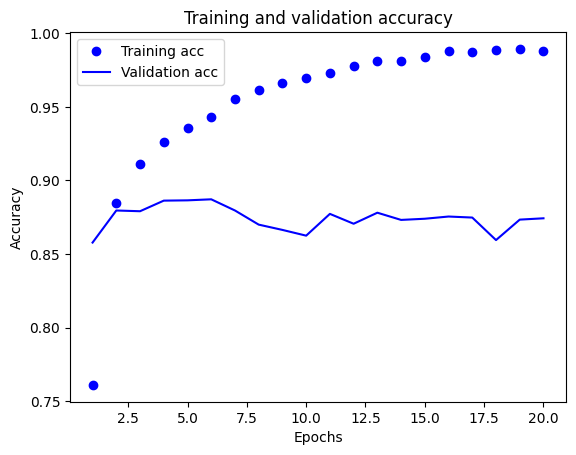

In [33]:
# Build the model
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

# Use first 10000 examples as a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

# Plot accuracy
epochs = list(range(1,21))
history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 2.  Report training/validation/test accuracy after training with the optimal epoch determined above

In [34]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=6, batch_size=512,validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
print('Training accuracy:')
print(acc)
print('Validation accuracy')
print(val_acc)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.7089 - loss: 0.2048 - val_accuracy: 0.8901 - val_loss: 0.1113
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8876 - loss: 0.1046 - val_accuracy: 0.9156 - val_loss: 0.0780
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9136 - loss: 0.0752 - val_accuracy: 0.9298 - val_loss: 0.0639
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9267 - loss: 0.0645 - val_accuracy: 0.9405 - val_loss: 0.0554
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9323 - loss: 0.0580 - val_accuracy: 0.9483 - val_loss: 0.0484
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9428 - loss: 0.0505 - val_accuracy: 0.9458 - val_loss: 0.0490
Training accuracy:
[0.7961999773979187, 0.891040027141571, 0.9110400080680847, 0.9236800074577332, 0.9312000274658203, 0.9395999908447266]
Validation accuracy
[0.8901000022888184, 0.9156000018119812, 0.9297999739646912, 0.940500020980835, 0.948

### 3. Conclusion
In summary, since using binary_crossentropy loss function and epoch 4 give us training accuracy 0.9353200197219849 and validation accuracy 0.9567999839782715.

Using mse loss function, we first find the optimal epoch as 6, then use it to find the training accuracy is 0.9395999908447266 and validation accuracy is 0.9458000063896179

We see using mse loss function has better training accuracy and binary_crossentropy has better validation accuracy.